In [25]:
import pandas as pd
import numpy as np
import ast
import re


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import obspy
# from tqdm import tqdm
from glob import glob
# import time
import random
import os
import sys
from datetime import datetime
from tqdm import tqdm

from scipy import stats,signal


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
# from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset


import numpy as np
import scipy.signal as signal

from matplotlib import lines as mlines

import sys
sys.path.append('../src')
from utils import apply_cosine_taper, butterworth_filter, resample_array


import numpy as np
import torch
import torch.nn.functional as F
from obspy import UTCDateTime, Stream
from obspy.clients.fdsn import Client
from scipy import signal
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
import pickle
from joblib import dump, load


import os
# Specify the directory containing the module
module_path = os.path.abspath(os.path.join('..', 'src'))

# Add the directory to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

import seis_feature
from utils import apply_cosine_taper, butterworth_filter, resample_array
 

from deep_learning_architectures import MyCNN_1d
from deep_learning_architectures import MyCNN_2d
from deep_learning_architectures import SeismicCNN_2d
from deep_learning_architectures import MyResCNN2D

import matplotlib.lines as mlines
import json


from zenodo_get import zenodo_get
doi = '10.5281/zenodo.13334838'
files = zenodo_get([doi])



from all_models_classification import compute_window_probs
from all_models_classification import plot_z_component_with_probs
from all_models_classification import plot_all_model_probs

Title: Trained Random Forest Model and Scaler Parameters for (Phy+Man), 15 August, 2024
Keywords: 
Publication date: 2024-08-15
DOI: 10.5281/zenodo.13334838
Total size: 787.9 MB

Link: https://zenodo.org/record/13334838/files/best_rf_model_all_features_phy_man_P_10_30_F_05_15_50.joblib   size: 191.0 MB

Checksum is correct. (7398572baf267d603e53e0203340cc8f)

Link: https://zenodo.org/record/13334838/files/scaler_params_phy_man_P_10_30_F_05_15_50.csv   size: 0.0 MB

Checksum is correct. (cb4201470bac8fc1a7c19a20775ef95c)

Link: https://zenodo.org/record/13334838/files/scaler_params_phy_man_P_10_100_F_05_15_50.csv   size: 0.0 MB

Checksum is correct. (5978efd4b65ea406248f2bbb5db66e2f)

Link: https://zenodo.org/record/13334838/files/best_rf_model_all_features_phy_man_P_10_100_F_05_15_50.joblib   size: 196.8 MB

Checksum is correct. (491182443ae7eb720ba981e80f209323)

Link: https://zenodo.org/record/13334838/files/best_rf_model_all_features_phy_man_top_20_P_10_30_F_05_15_50.joblib   size: 

## Loading the machine learning models

In [26]:
## setting up some important parameters (not to be changed)
num_channels = 3
dropout = 0.9
# Check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



## initiating the model architectures - 
#model_seismiccnn_1d = SeismicCNN_1d(num_classes=4, num_channels=num_channels,dropout_rate=dropout).to(device)  # Use 'cuda' if you have a GPU available
model_seismiccnn_2d = SeismicCNN_2d(num_classes=4, num_channels=num_channels,dropout_rate=dropout).to(device)  # Use 'cuda' if you have a GPU available
model_mycnn_1d = MyCNN_1d(num_classes=4, num_channels=num_channels,dropout_rate=dropout).to(device)  # Use 'cuda' if you have a GPU available
model_mycnn_2d = MyCNN_2d(num_classes=4, num_channels=num_channels,dropout_rate=dropout).to(device)  # Use 'cuda' if you have a GPU available
model_myrescnn_2d = MyResCNN2D(num_classes=4, num_channels=num_channels,dropout_rate=dropout).to(device)  # Use 'cuda' if you have a GPU available




# Load the saved model state dict (weights)
saved_model_seismiccnn_2d = torch.load('../trained_deep_learning_models/best_model_SeismicCNN_2d.pth', map_location=torch.device('cpu'))  # No'weights_only' argument

# Load the saved model state dict (weights)
saved_model_mycnn_2d = torch.load('../trained_deep_learning_models/best_model_MyCNN_2d.pth', map_location=torch.device('cpu'))  # No 'weights_only' argument

# Load the saved model state dict (weights)
saved_model_myrescnn_2d = torch.load('../trained_deep_learning_models/best_model_MyResCNN2D.pth', map_location=torch.device('cpu'))  # No 'weights_only' argument

# Load the saved model state dict (weights)
saved_model_mycnn_1d = torch.load('../trained_deep_learning_models/best_model_MyCNN_1d.pth', map_location=torch.device('cpu'))  # No 'weights_only' argument



# Load the state dict into the model
model_seismiccnn_2d.load_state_dict(saved_model_seismiccnn_2d)
model_mycnn_2d.load_state_dict(saved_model_mycnn_2d)
model_myrescnn_2d.load_state_dict(saved_model_myrescnn_2d)
model_mycnn_1d.load_state_dict(saved_model_mycnn_1d)



# Move the model to the correct device (GPU or CPU)
model_seismiccnn_2d.to(device)
model_mycnn_2d.to(device)
model_myrescnn_2d.to(device)
model_mycnn_1d.to(device)


# Put the model in evaluation mode (important for models with dropout/batch norm layers)
model_seismiccnn_2d.eval()
model_mycnn_2d.eval()
model_myrescnn_2d.eval()
model_mycnn_1d.eval()

/tmp/ipykernel_2268706/2479205158.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model_seismiccnn_2d = torch.load('../trained_deep_learning_models/best_model_Sei

MyCNN_1d(
  (conv1): Conv1d(3, 8, kernel_size=(9,), stride=(1,), padding=(4,))
  (conv2): Conv1d(8, 8, kernel_size=(9,), stride=(2,), padding=(4,))
  (conv3): Conv1d(8, 16, kernel_size=(7,), stride=(1,), padding=(3,))
  (conv4): Conv1d(16, 16, kernel_size=(7,), stride=(2,), padding=(3,))
  (conv5): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv6): Conv1d(32, 32, kernel_size=(5,), stride=(2,), padding=(2,))
  (conv7): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=T

## Parameters to provide

In [27]:
start_time = obspy.UTCDateTime(2024, 8, 15, 17, 39, 52) - 0
end_time = start_time + 300
        
stations_id = ['CC.WOW', 'CC.TAVI',  'CC.GNOB', 'CC.ARAT', 'CC.TABR', 'UW.RER']
location = "*"

## Computation of the probabilities

In [28]:
client = Client("IRIS")

# Define parameters
orig_sr = 100  # original sampling rate
new_sr = 50    # new sampling rate
stride = 10 * orig_sr
lowpass = 1
highpass = 20
window_length = 100
channel_patterns = ["EH", "BH", "HH"]



# Initialize result lists


# Function to process and compute probabilities
def process_model(model, stations_id, location, start_time, end_time, one_d, model_type, filename):
    return compute_window_probs(
        stations_id=stations_id, location=location, start_time=start_time, 
        end_time=end_time, channel_patterns=channel_patterns, client=client, 
        stride=stride, orig_sr=orig_sr, new_sr=new_sr, window_length=window_length, 
        lowpass=lowpass, highpass=highpass, one_d=one_d, model=model, 
        model_type=model_type, filename=filename
    )






# Compute probabilities for different models
stn_probs_mycnn_1d, _, big_station_ids = process_model(
    model_mycnn_1d, stations_id, location, start_time, end_time, 
    one_d=True, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_mycnn_2d, big_reshaped_data, _ = process_model(
    model_mycnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_seismiccnn_2d, _, _ = process_model(
    model_seismiccnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_myrescnn_2d, _, _ = process_model(
    model_myrescnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)




# The model parameter is irrelevant for ml models. 
model = model_mycnn_1d
# Machine Learning model probabilities
stn_probs_ml_40, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_10_30_F_05_15_50'
)
stn_probs_ml_110, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_10_100_F_05_15_50'
)
stn_probs_ml_150, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_50_100_F_05_15_50'
)


 17%|█▋        | 1/6 [00:00<00:03,  1.52it/s]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:01<00:02,  1.43it/s]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:02<00:02,  1.27it/s]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:03<00:01,  1.23it/s]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:03<00:00,  1.36it/s]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:00<00:04,  1.17it/s]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:01<00:03,  1.23it/s]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:02<00:02,  1.37it/s]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:02<00:01,  1.51it/s]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:03<00:00,  1.40it/s]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:00<00:02,  1.72it/s]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:01<00:02,  1.73it/s]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:01<00:01,  1.72it/s]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:02<00:01,  1.66it/s]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:02<00:00,  1.67it/s]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:00<00:02,  1.74it/s]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:01<00:02,  1.74it/s]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:01<00:01,  1.73it/s]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:02<00:01,  1.73it/s]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:02<00:00,  1.71it/s]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)
Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:02<00:12,  2.45s/it]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:04<00:09,  2.42s/it]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:08<00:09,  3.02s/it]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:10<00:05,  2.72s/it]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:13<00:02,  2.59s/it]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:02<00:10,  2.00s/it]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:03<00:07,  1.99s/it]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:05<00:05,  1.99s/it]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:07<00:03,  2.00s/it]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:10<00:02,  2.01s/it]

Reshaped data: (1, 3, 30000)


  0%|          | 0/6 [00:00<?, ?it/s]

Reshaped data: (1, 3, 30000)


 17%|█▋        | 1/6 [00:01<00:09,  2.00s/it]

Reshaped data: (1, 3, 30000)


 33%|███▎      | 2/6 [00:03<00:07,  1.85s/it]

Reshaped data: (1, 3, 30000)


 50%|█████     | 3/6 [00:05<00:05,  1.82s/it]

Reshaped data: (1, 3, 30000)


 67%|██████▋   | 4/6 [00:07<00:03,  1.80s/it]

Reshaped data: (1, 3, 30000)


 83%|████████▎ | 5/6 [00:09<00:01,  1.89s/it]

Reshaped data: (1, 3, 30000)


100%|██████████| 6/6 [00:11<00:00,  1.86s/it]


## Plotting probabilities from all models

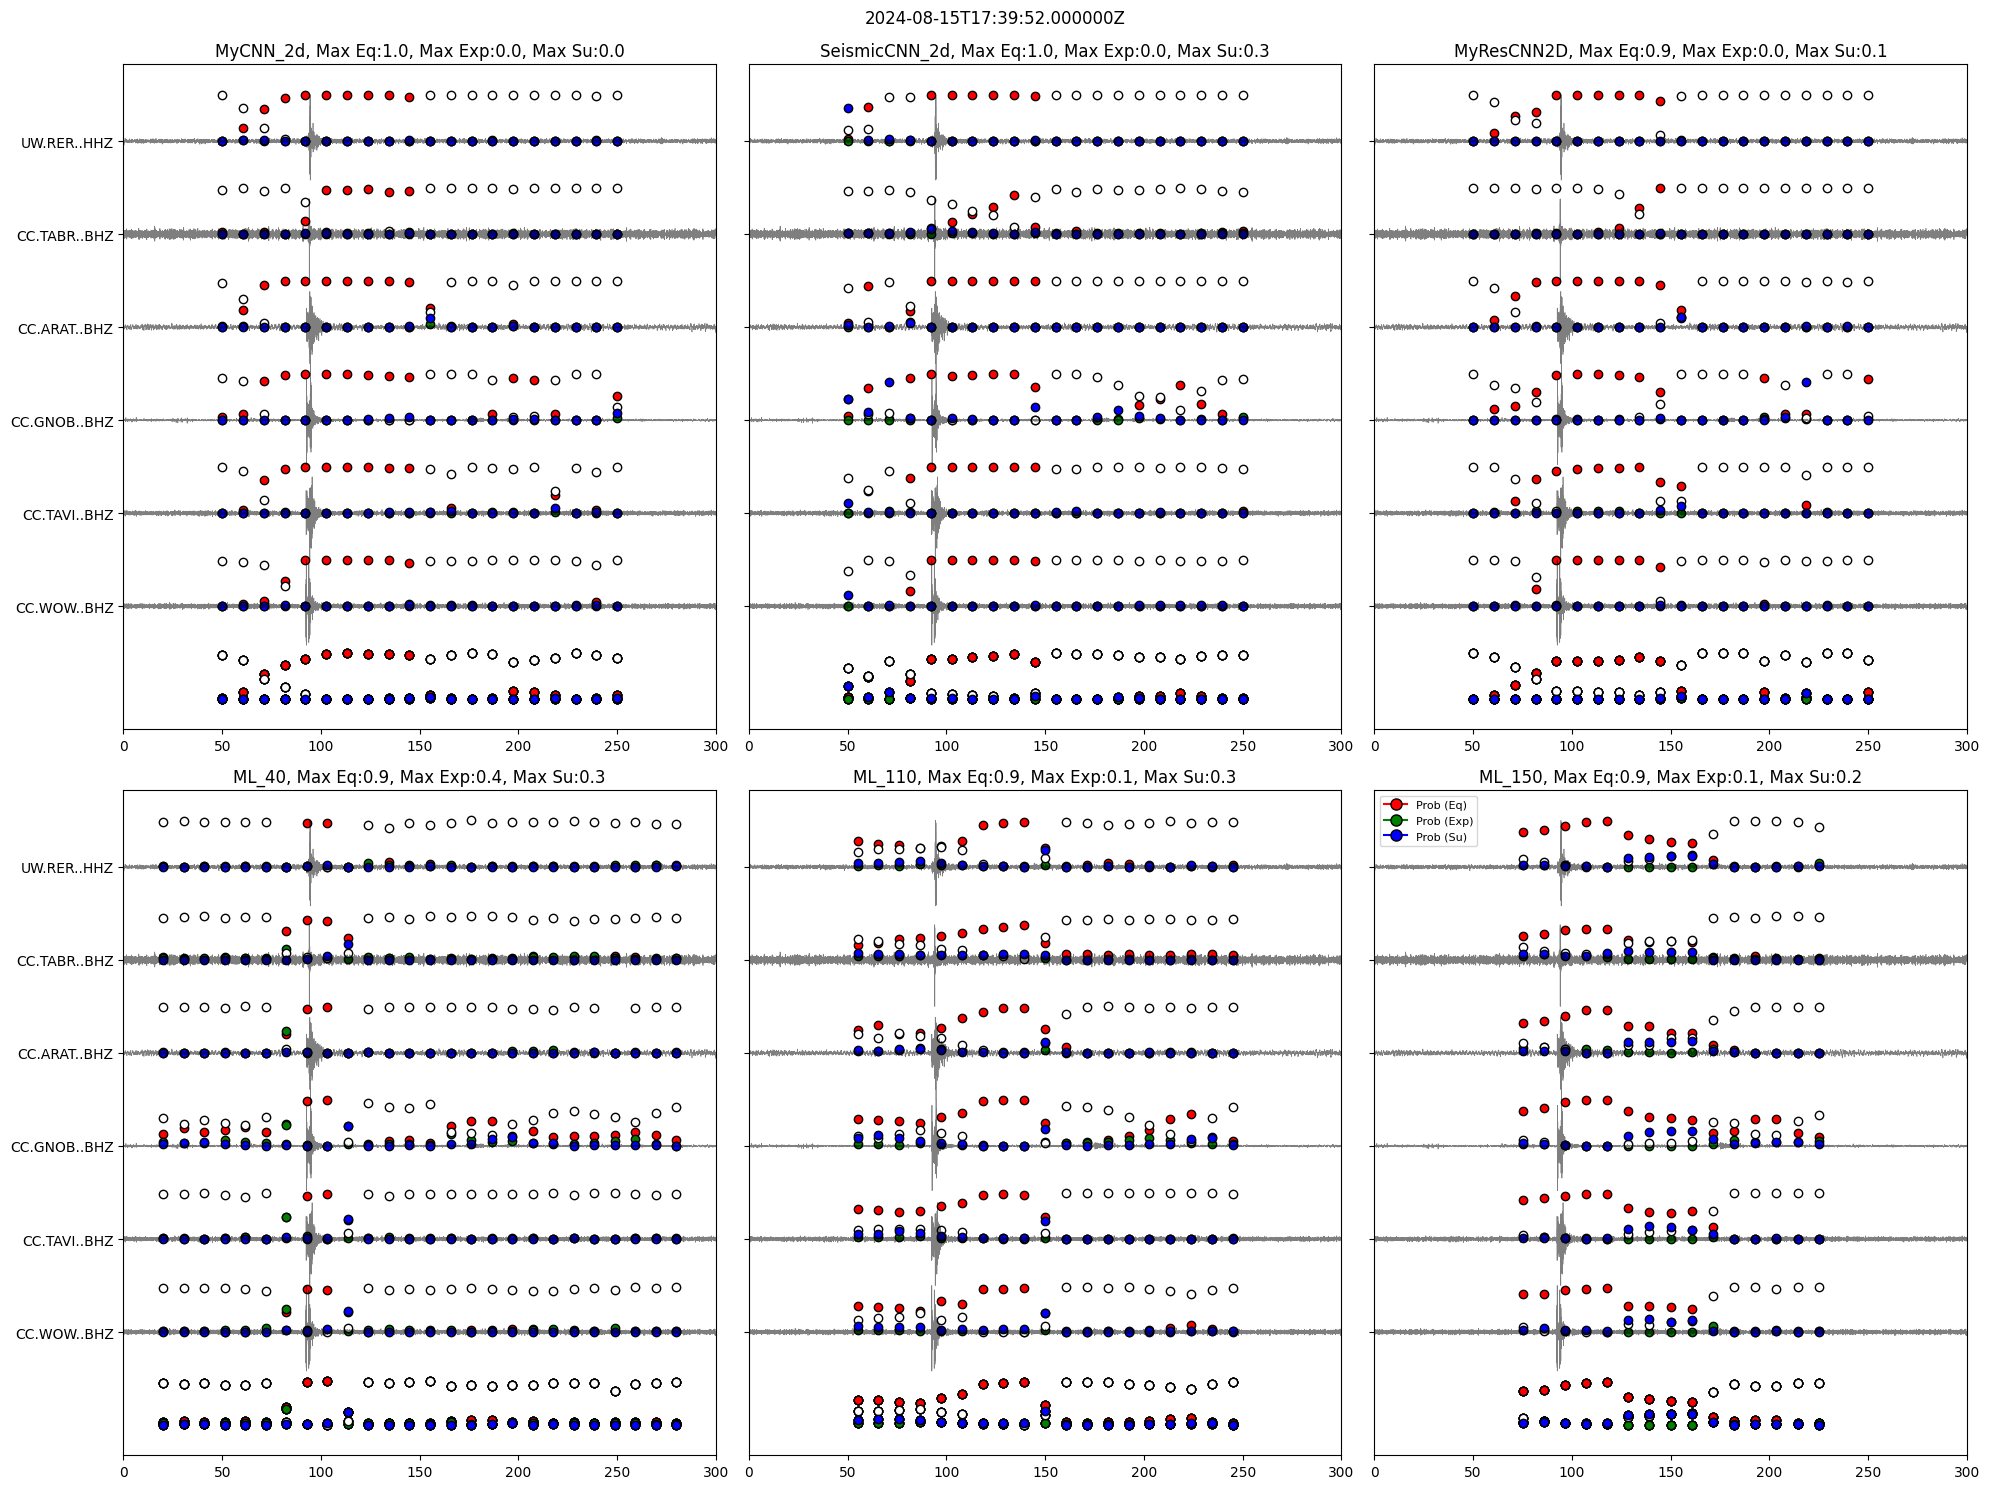

In [29]:
stn_probs_dl = stn_probs_dl = [(stn_probs_mycnn_2d, 'MyCNN_2d'), (stn_probs_seismiccnn_2d, 'SeismicCNN_2d'), (stn_probs_myrescnn_2d, 'MyResCNN2D')]
stn_probs_ml = [(stn_probs_ml_40, 'ML_40', 40), (stn_probs_ml_110, 'ML_110', 110), (stn_probs_ml_150, 'ML_150', 150)]
plot_all_model_probs(stn_probs_dl, stn_probs_ml, big_reshaped_data, orig_sr, start_time, end_time, big_station_ids)


## Plotting probabilities from any single model

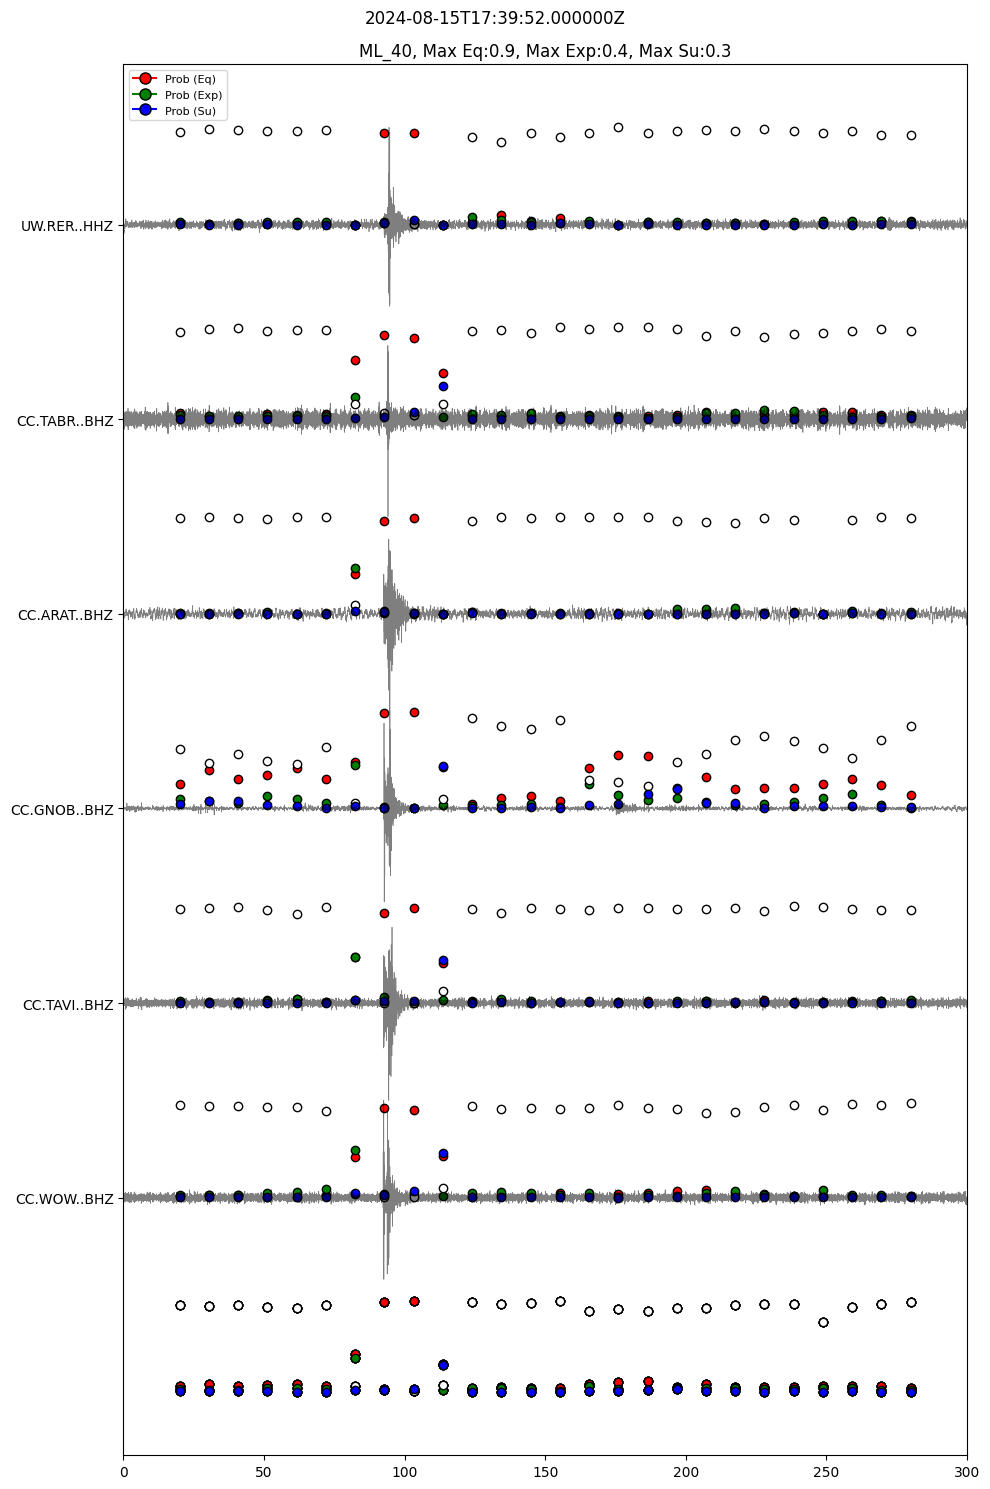

In [30]:
from all_models_classification import plot_single_model_probs
stn_probs = [(stn_probs_ml_40, 'ML_40', 40)]
plot_single_model_probs(stn_probs,  big_reshaped_data, orig_sr, start_time, end_time, big_station_ids, fig_size = (10, 15))


## Testing it on debris flow event

There was a group of debris flows that occurred at Mount St. Helens that was associated with a minor atmospheric river event on October 27, 2024 (UTC).


In [31]:
start_time = obspy.UTCDateTime(2024, 10, 27, 9, 48, 0) - 100
end_time = start_time + 3000
        
stations_id = ['UW.SHW','CC.SWF2']

location = "*"

In [32]:
client = Client("IRIS")

# Define parameters
orig_sr = 100  # original sampling rate
new_sr = 50    # new sampling rate
stride = 10 * orig_sr
lowpass = 1
highpass = 20
window_length = 100
channel_patterns = ["EH", "BH", "HH"]



# Initialize result lists


# Function to process and compute probabilities
def process_model(model, stations_id, location, start_time, end_time, one_d, model_type, filename):
    return compute_window_probs(
        stations_id=stations_id, location=location, start_time=start_time, 
        end_time=end_time, channel_patterns=channel_patterns, client=client, 
        stride=stride, orig_sr=orig_sr, new_sr=new_sr, window_length=window_length, 
        lowpass=lowpass, highpass=highpass, one_d=one_d, model=model, 
        model_type=model_type, filename=filename
    )






# Compute probabilities for different models
stn_probs_mycnn_1d, _, big_station_ids = process_model(
    model_mycnn_1d, stations_id, location, start_time, end_time, 
    one_d=True, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_mycnn_2d, big_reshaped_data, _ = process_model(
    model_mycnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_seismiccnn_2d, _, _ = process_model(
    model_seismiccnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)


stn_probs_myrescnn_2d, _, _ = process_model(
    model_myrescnn_2d, stations_id, location, start_time, end_time, 
    one_d=False, model_type='dl', filename='P_10_30_F_05_15_50'
)




# The model parameter is irrelevant for ml models. 
model = model_mycnn_1d
# Machine Learning model probabilities
stn_probs_ml_40, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_10_30_F_05_15_50'
)
stn_probs_ml_110, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_10_100_F_05_15_50'
)
stn_probs_ml_150, _, _ = process_model(
    model, stations_id, location, start_time, end_time, 
    one_d=False, model_type='ml', filename='P_50_100_F_05_15_50'
)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:02<00:02,  2.34s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:02<00:02,  2.33s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:01<00:01,  1.96s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:01<00:01,  1.95s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:18<00:18, 18.71s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:20<00:20, 20.51s/it]

Reshaped data: (1, 3, 300000)


  0%|          | 0/2 [00:00<?, ?it/s]

Reshaped data: (1, 3, 300000)


 50%|█████     | 1/2 [00:20<00:20, 20.55s/it]

Reshaped data: (1, 3, 300000)


100%|██████████| 2/2 [00:41<00:00, 20.72s/it]


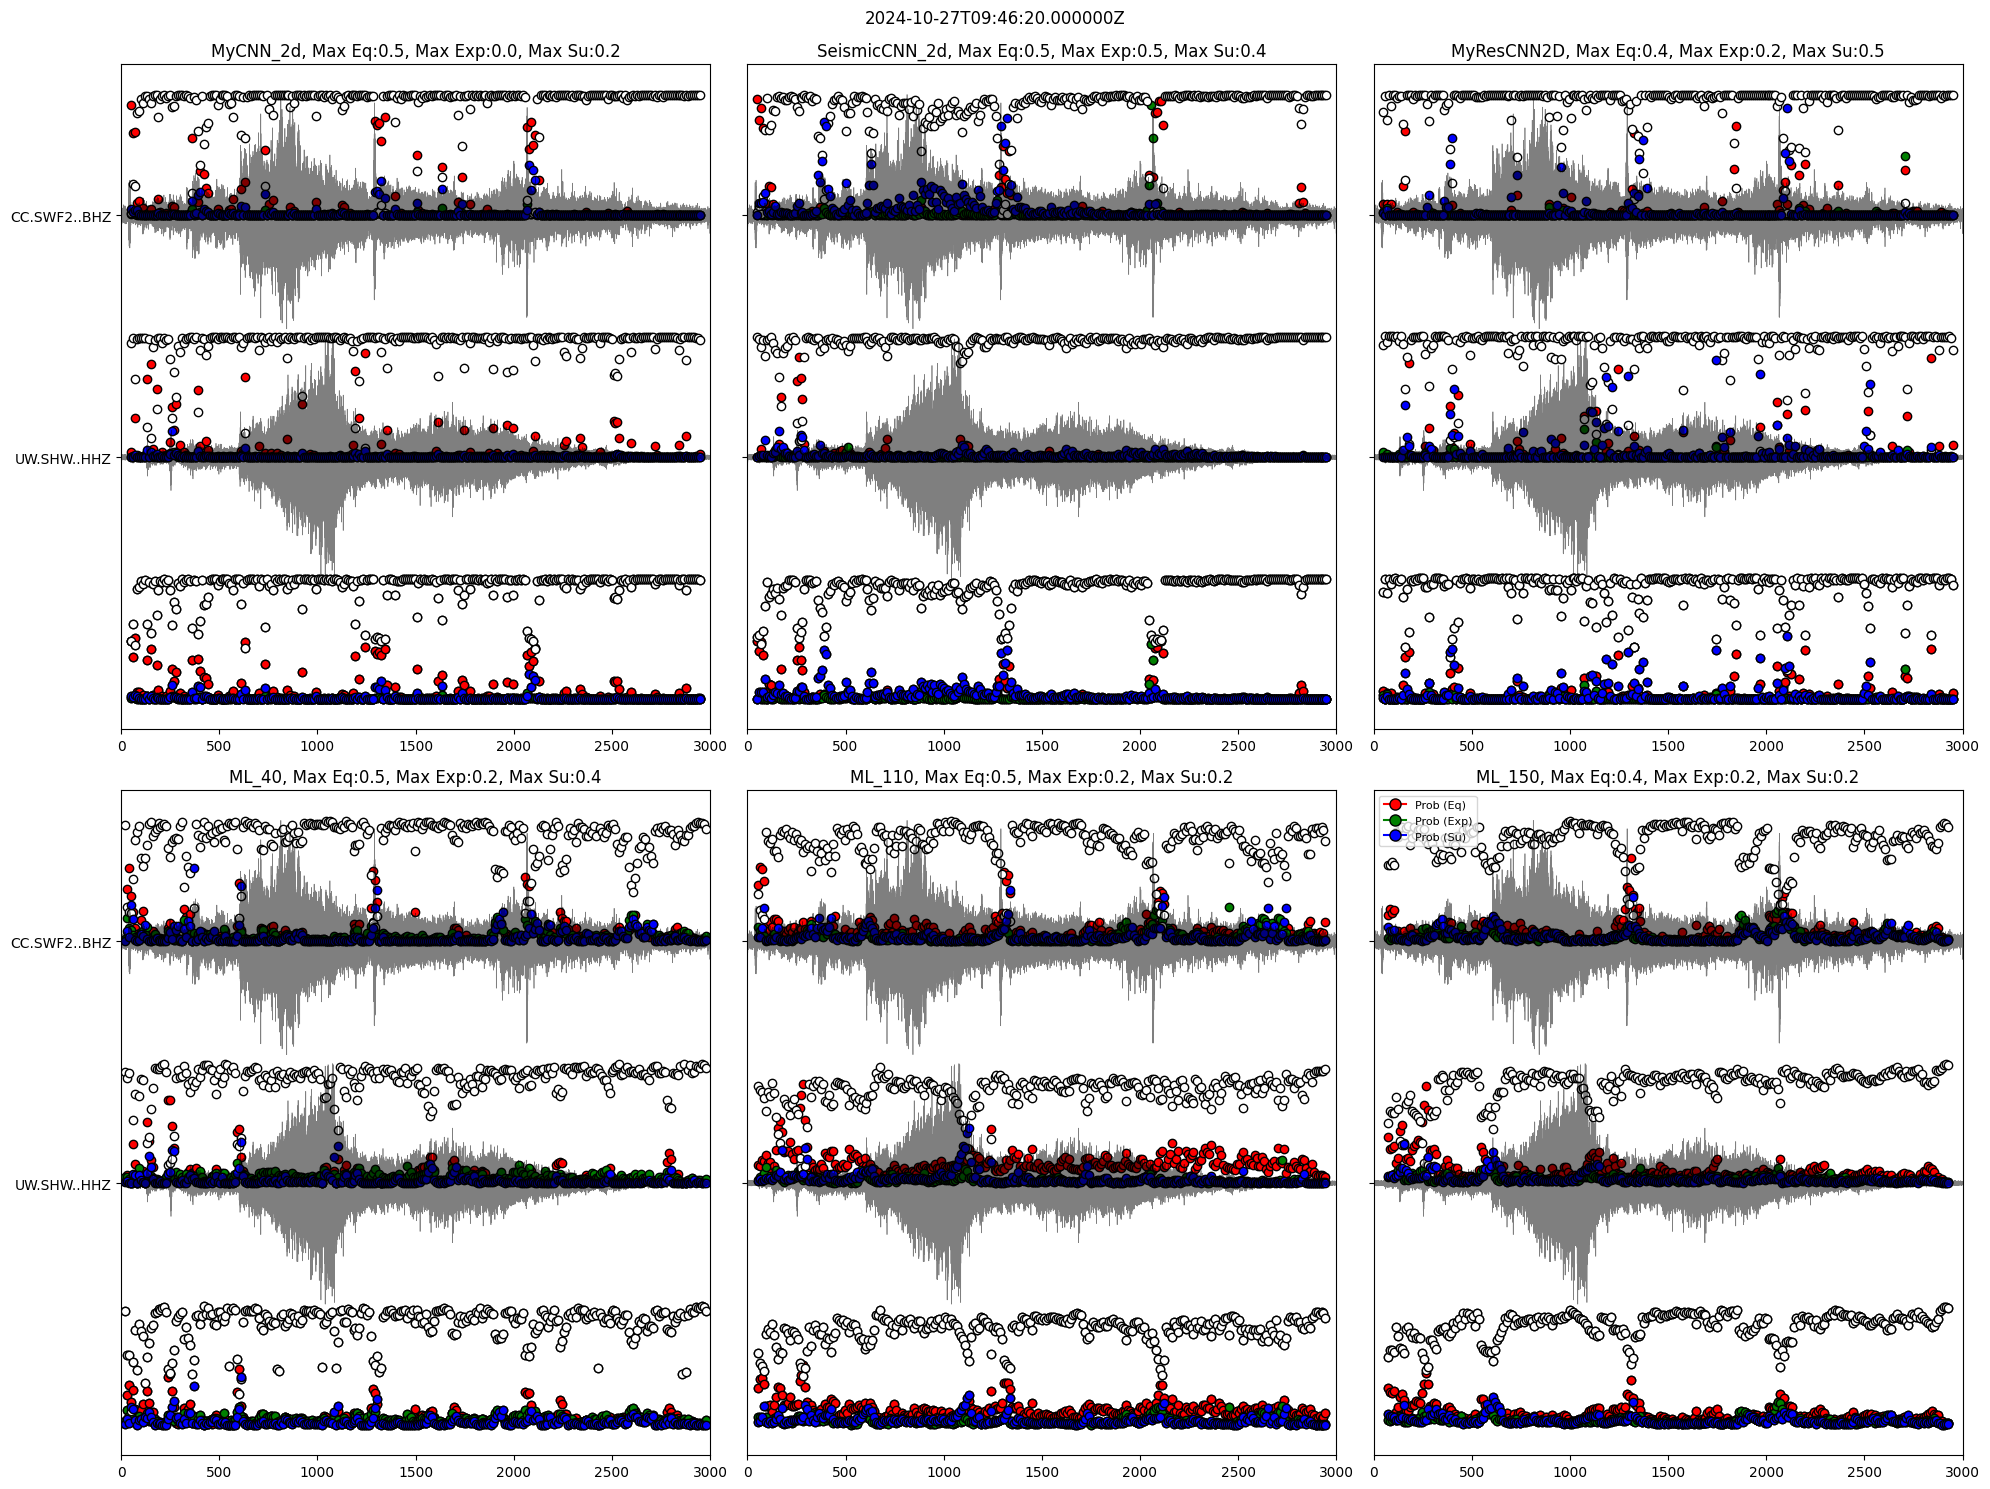

In [33]:
stn_probs_dl = stn_probs_dl = [(stn_probs_mycnn_2d, 'MyCNN_2d'), (stn_probs_seismiccnn_2d, 'SeismicCNN_2d'), (stn_probs_myrescnn_2d, 'MyResCNN2D')]
stn_probs_ml = [(stn_probs_ml_40, 'ML_40', 40), (stn_probs_ml_110, 'ML_110', 110), (stn_probs_ml_150, 'ML_150', 150)]
plot_all_model_probs(stn_probs_dl, stn_probs_ml, big_reshaped_data, orig_sr, start_time, end_time, big_station_ids)


## Deleting the big downloaded model files

In [35]:
# Get the current working directory
directory = os.getcwd()

# List the files in the directory
files = os.listdir(directory)

# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".joblib"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)
        
# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)